<a href="https://colab.research.google.com/github/Dannapaola1225/ejercicios1/blob/main/Polinomio%20Osculante%20de%20Hermite%20con%20Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import sympy as sp
from tabulate import tabulate
import matplotlib.pyplot as plt

In [11]:
#comenzamos con el método
def Hermite(xi, fi, dfi, x):
    n = len(xi)
    z = np.zeros(2 * n)  # Nodos duplicados
    Q = np.zeros((2 * n, 2 * n))  # Tabla de coeficientes del método de diferencias divididas

    # Paso 1: Inicializar nodos y primera columna de Q
    for i in range(n):
        z[2 * i] = xi[i]
        z[2 * i + 1] = xi[i]
        Q[2 * i][0] = fi[i]
        Q[2 * i + 1][0] = fi[i]
        Q[2 * i + 1][1] = dfi[i]
    # calcular diferencias divididas entre nodos duplicados
        if i != 0:
            Q[2 * i][1] = (Q[2 * i][0] - Q[2 * i - 1][0]) / (z[2 * i] - z[2 * i - 1])

    # Paso 2: Calcular el resto de la tabla de diferencias divididas
    for i in range(2, 2 * n):  # Recorrer columnas
        for j in range(i, 2 * n):  # Recorrer filas desde la diagonal principal
            Q[j][i] = (Q[j][i - 1] - Q[j - 1][i - 1]) / (z[j] - z[j - i])

    # Paso 3: Construir el polinomio de Hermite
     # Elabora los coeficientes del polinomio de Hermite
    n = len(xi)
    coef = [round(Q[i][i], 7) for i in range(2 * n)]
    # Construye el polinomio de Hermite
    polinomio =  f"{coef[0]}"
    for i in range(1, 2 * n):
        term = f"{coef[0]}"
        for j in range(i):
            term += f"*(x - {z[j]})"
        polinomio += " + " + term

    # Paso 4: Evaluar el polinomio en el punto x
    valor_polinomio = coef[0]
    for i in range(1, 2 * n):
        valor = coef[i]
        for j in range(i):
            valor *= (x - z[j])
        valor_polinomio += valor

    return Q, z, sp.expand(polinomio), valor_polinomio

In [15]:
def graficar_polinomio(polinomio, xi, x_eval):

    x = sp.Symbol('x')
    f = sp.lambdify(x, polinomio, 'numpy')

    # Crear un rango de valores para x
    x_vals = np.linspace(min(xi) - 1, max(xi) + 1, 500)
    y_vals = f(x_vals)

    # Graficar el polinomio
    plt.figure(figsize=(8, 6))
    plt.plot(x_vals, y_vals, label='Polinomio de Hermite', color='blue')

    # Graficar los puntos originales
    for x_i, y_i in zip(xi, fi):
        plt.scatter(x_i, y_i, color='red', label=f'Punto ({x_i}, {y_i})')

    # Marcar el punto evaluado
    plt.scatter(x_eval, f(x_eval), color='green', label=f'Punto evaluado (x={x_eval:.2f}, y={f(x_eval):.5f})')

    plt.title("Polinomio de Hermite")
    plt.xlabel("x")
    plt.ylabel("H(x)")
    plt.legend()
    plt.grid()
    plt.show()

Ingrese los valores de xi separados por comas: 1.3, 1.6, 1.9
Ingrese los valores de f(xi) separados por comas: 0.6200860, 0.4554022, 0.2818186
Ingrese los valores de f'(xi) separados por comas: -0.5220232, -0.5698959, -0.5811571
Ingrese el valor de x donde se evaluará el polinomio: 1.5

Tabla de diferencias divididas:
+-----+-----------+------------+------------+-----------+-----------+------------+
|  z  |    Q0     |     Q1     |     Q2     |    Q3     |    Q4     |     Q5     |
+-----+-----------+------------+------------+-----------+-----------+------------+
| 1.3 | 0.620086  |    0.0     |    0.0     |    0.0    |    0.0    |    0.0     |
| 1.3 | 0.620086  | -0.5220232 |    0.0     |    0.0    |    0.0    |    0.0     |
| 1.6 | 0.4554022 | -0.548946  | -0.0897427 |    0.0    |    0.0    |    0.0     |
| 1.6 | 0.4554022 | -0.5698959 | -0.069833  | 0.0663656 |    0.0    |    0.0     |
| 1.9 | 0.2818186 | -0.578612  | -0.0290537 | 0.0679656 | 0.0026667 |    0.0     |
| 1.9 | 0.281818

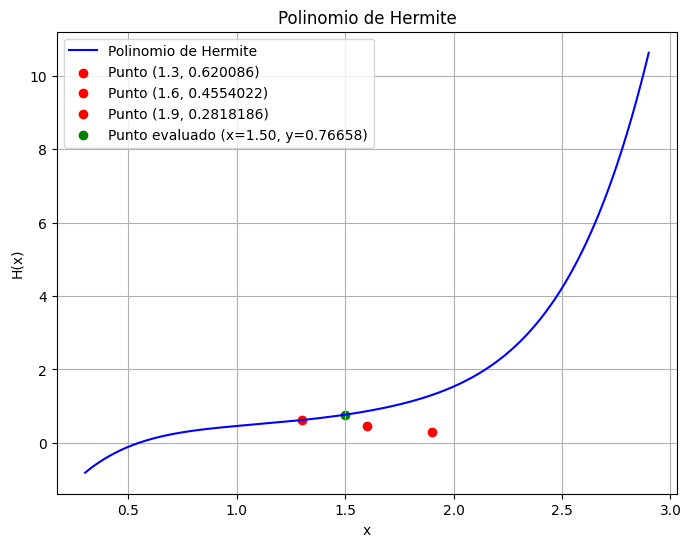

In [18]:
if __name__ == "__main__":
    # Entrada de datos iniciales
    xi = [float(x) for x in input("Ingrese los valores de xi separados por comas: ").split(',')]
    fi = [float(f) for f in input("Ingrese los valores de f(xi) separados por comas: ").split(',')]
    dfi = [float(df) for df in input("Ingrese los valores de f'(xi) separados por comas: ").split(',')]
    x = float(input("Ingrese el valor de x donde se evaluará el polinomio: "))

    # Calcular el polinomio de Hermite
    Q, z, polinomio, valor_polinomio = Hermite(xi, fi, dfi, x)

    # Mostrar la tabla de diferencias divididas
    datos = [[z[i]] + [round(num, 7) for num in Q[i]] for i in range(len(z))]
    columnas = ["z"] + [f"Q{i}" for i in range(len(Q))]
    print("\nTabla de diferencias divididas:")
    print(tabulate(datos, headers=columnas, tablefmt="pretty"))

    # Mostrar el polinomio de Hermite
    print("\nEl Polinomio de Hermite obtenido es:")
    print(f"H(x) = {polinomio}")

    # Mostrar el valor del polinomio evaluado en x
    print(f"\nEl valor del polinomio evaluado en x = {x} es:")
    print(f"H({x}) = {round(valor_polinomio, 7)}")

    # Graficar el polinomio
    graficar_polinomio(polinomio, xi, x)
